In [1]:
from sklearn.datasets import load_digits, load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inline

# Import digits data and visualize digits


In [2]:
digits = load_digits()

In [3]:
print(digits.data.shape)

(1797, 64)


In [4]:
images = np.reshape(digits.data, (digits.data.shape[0], 8, 8))/16.0
y = digits.target

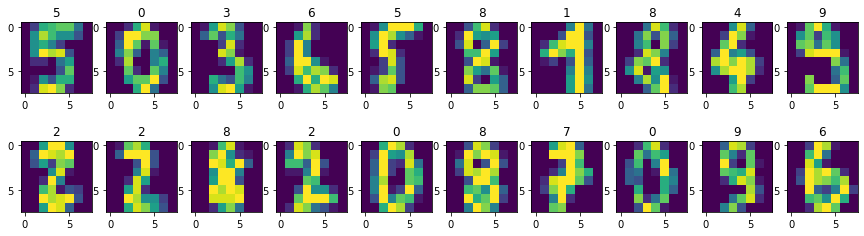

In [5]:

fig, ax = plt.subplots(2,10)
fig.set_figwidth(15)
nums = np.random.randint(0, len(images), 10)
for i, n in enumerate(nums):
    ax[0][i].set_title(str(y[n]))
    ax[0][i].imshow(images[n])
nums = np.random.randint(0, len(images), 10)
for i, n in enumerate(nums):
    ax[1][i].set_title(str(y[n]))
    ax[1][i].imshow(images[n])
plt.show()

# Use cross validation to find best max depth parameter

In [6]:
X = np.array(digits.data)
y = digits.target

In [7]:
results = []

for depth in range(2,11):
    result = 0
    param_list = [("max_depth", depth), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]
    kfold = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kfold.split(X):
        X_train_xgb = xgb.DMatrix(X[train_index], label=y[train_index])
        boosted_tree = xgb.train(param_list, X_train_xgb)
        result += np.sum(y[test_index] == boosted_tree.predict(xgb.DMatrix(X[test_index])))/len(y[test_index])
        
    result = result/10
    print('%s: %.8f' %(depth, result))
    results.append(result)

2: 0.90372750
3: 0.93656425
4: 0.94991310
5: 0.94046555
6: 0.94769398
7: 0.94713532
8: 0.94602731
9: 0.94877095
10: 0.95158908


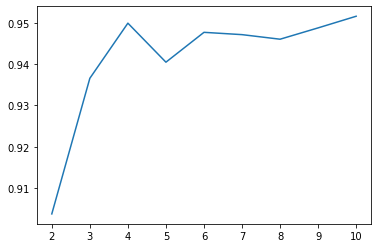

In [8]:
plt.plot(range(2,11), results)

# Use cross validation to find best eta parameter


In [9]:
results = []

for eta in np.linspace(0.1,1, 10):
    result = 0
    param_list = [("eta", eta), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]
    kfold = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kfold.split(X):
        X_train_xgb = xgb.DMatrix(X[train_index], label=y[train_index])
        boosted_tree = xgb.train(param_list, X_train_xgb)
        result += np.sum(y[test_index] == boosted_tree.predict(xgb.DMatrix(X[test_index])))/len(y[test_index])
        
    result = result/10
    print('%.1f: %.8f' %(eta, result))
    results.append(result)

0.1: 0.93045313
0.2: 0.94771260
0.3: 0.94547486
0.4: 0.94658287
0.5: 0.95378957
0.6: 0.94993482
0.7: 0.95269708
0.8: 0.95770950
0.9: 0.95327436
1.0: 0.95549659


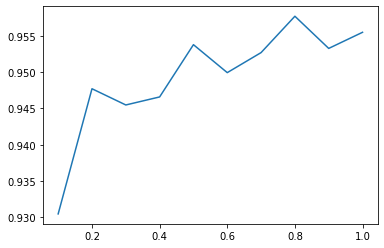

In [10]:
plt.plot(np.linspace(0.1,1, 10), results)

# Use cross validation to find best subsample parameter

In [11]:
results = []

for subsample in np.linspace(0.1,1, 10):
    result = 0
    param_list = [("subsample", subsample), ("objective", "multi:softmax"), ("eval_metric", "merror"), ("num_class", 10)]
    kfold = KFold(n_splits=10, shuffle=True)
    for train_index, test_index in kfold.split(X):
        X_train_xgb = xgb.DMatrix(X[train_index], label=y[train_index])
        boosted_tree = xgb.train(param_list, X_train_xgb)
        result += np.sum(y[test_index] == boosted_tree.predict(xgb.DMatrix(X[test_index])))/len(y[test_index])
        
    result = result/10
    print('%.1f: %.8f' %(subsample, result))
    results.append(result)

0.1: 0.90984792
0.2: 0.92766915
0.3: 0.94658908
0.4: 0.94432030
0.5: 0.94270019
0.6: 0.94494413
0.7: 0.95047796
0.8: 0.95268777
0.9: 0.95104904
1.0: 0.94990689


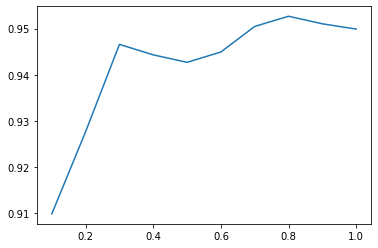

In [12]:
plt.plot(np.linspace(0.1,1, 10), results)

# Load boston data 


In [13]:
boston_data = load_boston()

In [14]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Split boston data in train test and fit regression using cross validation

In [15]:
X = np.array(boston_data.data)
y = boston_data.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
X_train_xgb = xgb.DMatrix(X_train, label=y_train)

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=X_train_xgb, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,metrics="rmse")

In [18]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750415,0.255242,21.758516,0.570829
1,19.784468,0.241202,19.833527,0.590184
2,18.060952,0.200957,18.148340,0.652259
3,16.479444,0.222687,16.607985,0.670038
4,15.089577,0.216047,15.276566,0.684570
5,13.813152,0.235376,14.095571,0.693490
6,12.624731,0.214732,12.894951,0.693702
7,11.651014,0.200230,11.981562,0.706061
8,10.681437,0.180673,11.055834,0.674449
9,9.883753,0.171522,10.280988,0.716243


# Print important features

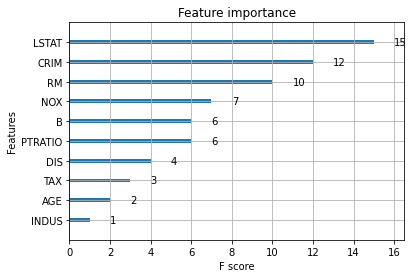

In [19]:
import pandas as pd

X_df = pd.DataFrame(X_train)
X_df.columns = boston_data.feature_names

X_train_xgb = xgb.DMatrix(X_df, label=y_train)

xg_model = xgb.train(params=params, dtrain=X_train_xgb)

xgb.plot_importance(xg_model)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()